In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [2]:
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# with open('image_predictions.tsv', 'wb') as file:
   # file.write(requests.get(url).content)

In [3]:
df_pred  = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df_tweet = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [8]:
import json
selected_cols = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        selected_cols.append({'tweet_id': data['id'],
                    'favorites': data['favorite_count'],
                    'retweets': data['retweet_count']})
basic_tweet = pd.DataFrame(selected_cols, columns=['tweet_id','favorites','retweets'])

In [9]:
basic_tweet.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Completeness

###  tweet_df

In [10]:
print(df_tweet.shape)
df_tweet.isnull().sum() # some of the columns are almost compltely missing and are not useful
# the expanded_urls has only 59 missing values, maybe I can try to fix it

(2356, 17)


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
df_tweet['expanded_urls']# take a look at this expanded_urls column

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [12]:
df_tweet.expanded_urls[0][-27:]

'/892420643555336193/photo/1'

In [13]:
df_tweet.tweet_id[0]
#The pattern seems to be https://twitter.com/dog_rates/status/ + tweet_id + /photo/1
# so I can fill in the missing value with this pattern

892420643555336193

In [14]:
# fill in the missing expanded_urls with https://twitter.com/dog_rates/status/ + tweet_id
def fill_in_urls(row):
    if pd.isnull(row['expanded_urls']):
        row['expanded_urls']= 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'
    else:
        row['expanded_urls']= row['expanded_urls']
    return row['expanded_urls']

df_tweet['expanded_urls']=df_tweet.apply(lambda row: fill_in_urls(row),axis=1)

In [15]:
df_tweet.expanded_urls[30], df_tweet.tweet_id[30]
# row30 was missing value, and now it has an url
# the number part of the url matches its id

('https://twitter.com/dog_rates/status/886267009285017600/photo/1',
 886267009285017600)

### df_pred

In [16]:
df_pred.isnull().sum()# no missing value

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### basic_tweet

In [17]:
basic_tweet.isnull().sum()# no missing value

tweet_id     0
favorites    0
retweets     0
dtype: int64

## Tidiness

### df_tweet

In [18]:
# doggo, floofer, pupper, puppo can be put into one column called dog_stage
df_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
df_tweet[(df_tweet.doggo=='None')&(df_tweet.floofer=='None')&(df_tweet.pupper=='None')&(df_tweet.puppo=='None')]
# in most of row, this dog stage is missing

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [20]:
# create a new column "dog_stage" and indicate which stage the dog is, including "doggo","floofer","pupper", or"puppo"
def dog_stage(row):
    if row['doggo']!='None':
        result=row['doggo']
    elif row['floofer']!='None':
        result=row['floofer']
    elif row['pupper']!='None':
        result=row['pupper']
    elif row['puppo']!='None':
        result=row['puppo']
    else:
        result="None"
    return result
df_tweet['dog_stage']=df_tweet.apply(lambda row:dog_stage(row),axis=1)

In [21]:
# the puppo column with non-None value does not equal to the new dog_stage column with the value "puppo"
(df_tweet[df_tweet.puppo!='None']['puppo']).equals(df_tweet[df_tweet.dog_stage=='puppo']['dog_stage'])

False

In [22]:
puppo=df_tweet[df_tweet.puppo!='None'].copy()
puppo.loc[puppo.dog_stage!='puppo']#Those two columns are not equal because of duplicated stages.
# row191 is both doggo and puppo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,doggo


In [23]:
# give it a new category called duplicated
df_tweet.loc[191,'dog_stage']='duplicated'

In [24]:
df_tweet.loc[191,'dog_stage']

'duplicated'

In [25]:
# the floofer column with non-None value does not equal to the new dog_stage column with the value "floofer"
(df_tweet[df_tweet.floofer!='None']['floofer']).equals(df_tweet[df_tweet.dog_stage=='floofer']['dog_stage'])

False

In [26]:
floofer=df_tweet[df_tweet.floofer!='None'].copy()
floofer.loc[floofer.dog_stage!='floofer']
# floofer has duplication too
# row200 is both doggo and floofer

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,doggo


In [27]:
# give it the same 'duplicated' value
df_tweet.loc[200,'dog_stage']='duplicated'

In [28]:
df_tweet.loc[200,'dog_stage']

'duplicated'

In [29]:
# the pupper column with non-None value does not equal to the new dog_stage column with the value "pupper"
(df_tweet[df_tweet.pupper!='None']['pupper']).equals(df_tweet[df_tweet.dog_stage=='pupper']['dog_stage'])

False

In [30]:
pupper=df_tweet[df_tweet.pupper!='None'].copy()
pupper_index=pupper.loc[pupper.dog_stage!='pupper'].index
df_tweet.loc[pupper_index,'dog_stage']='duplicated'
# pupper has many rows of duplication, I give them the value "duplicated" too since they are both pupper and doggo

In [31]:
# look fine when examined manually
df_tweet.loc[df_tweet.dog_stage=='duplicated']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,duplicated
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,duplicated
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,duplicated
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,duplicated
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,duplicated
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,duplicated
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,duplicated
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,duplicated
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,duplicated
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,duplicated


In [32]:
len(df_tweet.loc[df_tweet.dog_stage=='duplicated'])

14

In [33]:
# it should be False because doggo column should match "doggo" plus "duplicated" in dog_stage column
(df_tweet[df_tweet.doggo!='None']['doggo']).equals(df_tweet[df_tweet.dog_stage=='doggo']['dog_stage'])

False

In [34]:
df_tweet.drop(columns=['doggo','floofer','puppo','pupper'],inplace=True)

In [35]:
# At first, df_tweet has 17 columns, I created a dog_stage column and drop 4 columns. The number of columns matches 17+1-4=14
df_tweet.shape

(2356, 14)

In [36]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### df_pred, df_tweet, basic_tweet

In [37]:
# the three tables can be one
df_pred.shape, df_tweet.shape, basic_tweet.shape
# de_pred has less rows than the other two

((2075, 12), (2356, 14), (2354, 3))

In [38]:
df = pd.merge(df_tweet, basic_tweet, on='tweet_id', how='outer')

In [39]:
df = pd.merge(df,df_pred, on='tweet_id',how='outer')

In [40]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
dog_stage                        0
favorites                        2
retweets                         2
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
dtype: int64

In [41]:
df[~df.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,...,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,1.0,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,...,1.0,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,1.0,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True


In [42]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorites', 'retweets',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [43]:
# 'in_reply_to_status_id', 'in_reply_to_user_id' have many missing value and 
# they don't seem to be important in terms of analysis, so I'll get rid of them to make to dataframe
# looks cleaner
df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

In [44]:
df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Quality

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2356 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  dog_stage                   2356 non-null   object 
 12  favorites                   2354 non-null   float64
 13  retweets                    2354 

### data type

In [46]:
# tweet_id should be string
# tiemstamp should be timestamp
# dog_stage could be categorical
# favorites should be integer without decimal
# retweets should ne integer without decimal
# p1/p1_dog/p2/p2_dog/p3/p3_dog could be categorical
df[['dog_stage','p1','p1_dog','p2','p2_dog','p3','p3_dog']]=df[['dog_stage','p1','p1_dog','p2','p2_dog','p3','p3_dog']].astype('category')

In [47]:
df['tweet_id']=df['tweet_id'].astype(str)

In [48]:
df[['favorites','retweets']]=df[['favorites','retweets']].fillna(0.0).astype(int)

In [49]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [50]:
df.info()# re-check data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   source                      2356 non-null   object             
 3   text                        2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2356 non-null   object             
 8   rating_numerator            2356 non-null   int64              
 9   rating_denominator          2356 non-null   int64              
 10  name                        2356 non-null   object          

### 0 denominator

In [51]:
df.rating_denominator.value_counts()
# I don't understand how this rating system works, however a denominator of 0 doesn't make sense

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [52]:
df.iloc[np.where(df.rating_denominator==0)]
# the numerator is pretty extreme too, I guess it wanted to show something like an infinite rating, 
# however, if I want to analyze it based on math, it won't work. So I'll drop this row

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835246439...,960,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.drop(index=np.where(df.rating_denominator==0)[0],inplace=True)

## retweet

In [54]:
# retweets are not wanted, so I'll remove them
np.all(df[~df.retweeted_status_id.isnull()].index)==np.all(df[~df.retweeted_status_user_id.isnull()].index)

True

In [55]:
np.all(df[~df.retweeted_status_id.isnull()].index)==np.all(df[~df.retweeted_status_timestamp.isnull()].index)
# it looks like rows with values in "retweeted_status_id","retweeted_status_user_id","df.retweeted_status_timestamp"
# represent retweet instead of original ones, so I'll drop them

True

In [56]:
retweet_index=df[~df.retweeted_status_id.isnull()].index

In [57]:
df.drop(index=retweet_index,inplace=True)

In [58]:
df.shape

(2174, 25)

In [59]:
df.retweeted_status_id.isnull().sum(),df.retweeted_status_user_id.isnull().sum(),df.retweeted_status_timestamp.isnull().sum()
# now that all variables in these three columns are NaN, I'll drop them all

(2174, 2174, 2174)

In [60]:
df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

### retweets start with "RT" in text column 

In [61]:
df[df.text.str.contains(pat='^RT.+')]['text']
# there are two rows with text columns start with RT, they are probably retweet, so remove them as well

1286    RT if you are as ready for summer as this pup ...
1860    RT until we find this dog. Clearly a cool dog ...
Name: text, dtype: object

In [62]:
RT_index=df[df.text.str.contains(pat='^RT.+')].index

In [63]:
df.drop(index=RT_index,inplace=True)

### name column

In [64]:
df.name.value_counts()

None       677
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Staniel      1
Pip          1
Andru        1
Timber       1
Crimson      1
Name: name, Length: 956, dtype: int64

In [65]:
df[df.name=='a'].iloc[0]['text']

'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'

In [66]:
df[df.name=='a'].iloc[1]['text']
# it looks like rows with "a" in the name column is simply because names were not provided, I'll chage them to 'None'

'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq'

In [67]:
df['name']=df['name'].str.replace('^a','None')

In [68]:
df.name.value_counts()
#677+55=732, all the "a" have become None
#this column actually have some other "names" that do not look like names, but I am not planning to analyze dog names, 
# I'll just leave them as they are.

None         732
Lucy          11
Charlie       11
Cooper        10
Oliver        10
            ... 
Norman         1
Naphaniel      1
Kara           1
Colin          1
Crimson        1
Name: name, Length: 955, dtype: int64

### text column

In [69]:
# there are text and url in text column while I only want the text, so I'll remove the urls
df['text'] = df.text.str.rsplit(n=1, expand=True)[0]

In [70]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## source column

In [71]:
np.all(df.source)==np.any(df.source)

True

In [72]:
np.all(df.source)==df.source[1]
# it looks like all values in this column are the same, this column is useless in terms of analysis
# I'll drop it completely

True

In [73]:
df.drop(labels='source',axis=1, inplace=True)

### jpg url

In [74]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorites', 'retweets',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [75]:
df.loc[2355,'expanded_urls']

'https://twitter.com/dog_rates/status/666020888022790149/photo/1'

In [76]:
df.loc[2355,'jpg_url']
# expended_url direct to twitter site and jpg_url to a jpg photo, however, the two photos are basically the same.
# jpg_url is probably a backup for expanded_url.

'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'

In [77]:
df[~df['expanded_urls'].str.contains(pat='https://twitter.com/')]
# some expanded_urls do not direct to twitter site

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
335,832645525019123713,2017-02-17 17:38:57+00:00,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,3195,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,819238181065359361,2017-01-11 17:42:57+00:00,Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,pupper,2550,462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,808344865868283904,2016-12-12 16:16:49+00:00,This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,47281,24069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,802600418706604034,2016-11-26 19:50:26+00:00,This is Bailey. She has mastered the head tilt...,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,7938,1714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,791774931465953280,2016-10-27 22:53:48+00:00,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,37818,21156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,2015-12-16 00:09:23+00:00,Super speedy pupper. Does not go gentle into t...,https://vine.co/v/imJ0BdZOJTw,10,10,None,pupper,3231,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,676593408224403456,2015-12-15 02:43:33+00:00,This pupper loves leaves. 11/10 for committed ...,https://vine.co/v/eEQQaPFbgOY,11,10,None,pupper,4954,2410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,676121918416756736,2015-12-13 19:30:01+00:00,Here we are witnessing a very excited dog. Cle...,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,2335,1297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,674307341513269249,2015-12-08 19:19:32+00:00,This is life-changing. 12/10,https://vine.co/v/i7nWzrenw5h,12,10,life,None,12129,7641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
urls=df[~df.expanded_urls.str.contains(pat='https://twitter.com/')][['expanded_urls','jpg_url']].copy()

In [79]:
urls.isnull().sum()
# in those rows with non-twitter expanded_urls, none of them has jpg_url.
# I can say that this column is coupled with twitter site with photo or NaN when expanded_urls are not twitter site
# I'll discard this column since it is a duplicate url column

expanded_urls     0
jpg_url          93
dtype: int64

In [80]:
df.drop(labels='jpg_url',axis=1, inplace=True)

### Duplicate

In [81]:
df[df.duplicated(subset='expanded_urls',keep=False)]
# these two posts referred to the same dog, I'll drop one of them.

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
657,791774931465953280,2016-10-27 22:53:48+00:00,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,37818,21156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,668587383441514497,2015-11-23 00:30:28+00:00,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,1760,1174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df.drop(index=657,axis=0, inplace=True)

### rating denominators and rating numerators

In [83]:
numerator_denominator = df.text.str.extract(r'(\d{1,4})\/(\d{1,4})',expand=True)


In [84]:
rating = df[['rating_denominator','rating_numerator','text']].copy()
rating = pd.concat([rating,numerator_denominator], axis=1)
rating.rename(columns={0:'numerator',1:'denominator'},inplace=True)
rating


,rating_denominator,rating_numerator,text,numerator,denominator
0,10,13,This is Phineas. He's a mystical boy. Only eve...,13,10
1,10,13,This is Tilly. She's just checking pup on you....,13,10
2,10,12,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,10,13,This is Darla. She commenced a snooze mid meal...,13,10
4,10,12,This is Franklin. He would like you to stop ca...,12,10
...,...,...,...,...,...
2351,10,5,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,10,6,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,10,9,Here is a very happy pup. Big fan of well-main...,9,10
2354,10,7,This is a western brown Mitsubishi terrier. Up...,7,10


In [85]:
rating.denominator.isnull().sum()

17

In [86]:
rating.numerator.isnull().sum()

17

In [87]:
np.all(rating.denominator.isnull().sum()==rating.numerator.isnull().sum())
# there are 17 rows I did not catch their rating from the text

True

In [88]:
for i,k in enumerate((rating[rating.numerator.isnull()]).text):
    text=(rating[rating.numerator.isnull()]).text.iloc[i]
    print(i, text)
# take a look that all those 17 rows of text
# all of them don't contain rating information

0 @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards
1 @Marc_IRL pixelated af
2 @xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their
3 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through.
4 .@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a
5 @markhoppus
6 @bragg6of8 @Andy_Pace_ we are still looking for the first
7 @docmisterio account started on
8 @UNC can confirm
9 @HistoryInPics
10 I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to
11 PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to
12 @TheEllenShow I'm not sure if you know this but that doggo right th

In [89]:
rating = rating.loc[~rating.numerator.isnull(),:]

In [90]:
rating[['numerator','denominator']]=rating[['numerator','denominator']].astype('int64')

D:\Udemy\envs\my_env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [91]:
np.all(rating.numerator==rating.rating_numerator)

True

In [92]:
# except for 17 rows of text without rating information,
# all other rating information in the text column and in the rating_numerator, rating_denomiator match each other 

## Save the dataframe

In [93]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analysis

### rating characteristics

In [94]:
rating = df.rating_numerator/df.rating_denominator
upper=rating.quantile(0.75)
lower=rating.quantile(0.25)
IQR=upper-lower
boundary=upper+1.5*IQR
boundary


1.5

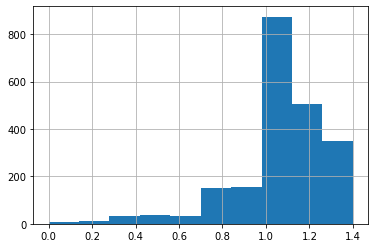

In [95]:
rating.iloc[np.where(rating<1.5)].hist();

In [96]:
# 11 data points are outliers
rating.loc[rating>=1.5]

55        1.700000
188      42.000000
189      66.600000
290      18.200000
291       1.500000
516       3.428571
695       7.500000
763       2.700000
979     177.600000
1712      2.600000
2074     42.000000
dtype: float64

In [97]:
# the ratio of numerator greater than denominator
rating_greater_than_one=(rating>1).sum()/len(rating)

In [98]:
rating_not_greater_than_one=(rating<=1).sum()/len(rating)

In [99]:
rating_greater_than_one, rating_not_greater_than_one

(0.5964993090741594, 0.4035006909258406)

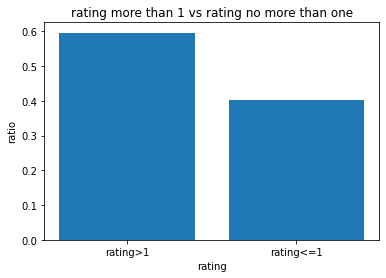

In [100]:
locations=[1,2]
heights=[rating_greater_than_one, rating_not_greater_than_one]
labels = ['rating>1', 'rating<=1']
plt.bar(locations, heights, tick_label=labels)
plt.title('rating more than 1 vs rating no more than one')
plt.xlabel('rating')
plt.ylabel('ratio');

In [101]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,8853,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,4328,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,8964,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,9774,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### relationship of favorites, retweets, and dog_stage

In [102]:
df1=df[['favorites','retweets','dog_stage']].copy()

<AxesSubplot:xlabel='retweets', ylabel='favorites'>

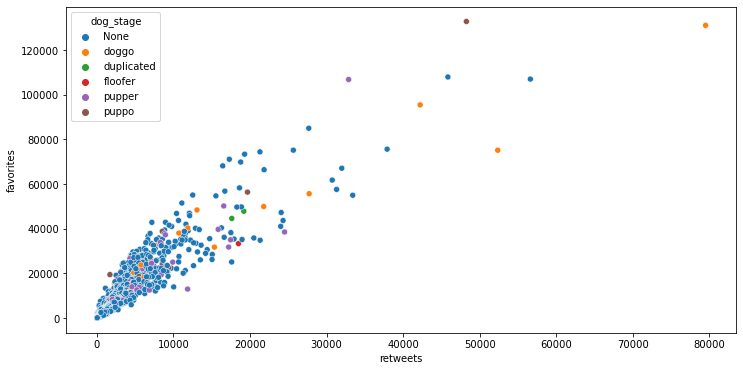

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='retweets',y='favorites', data=df1, hue='dog_stage')
# as expected, favorites and retweets are positively related

(0.0, 40000.0)

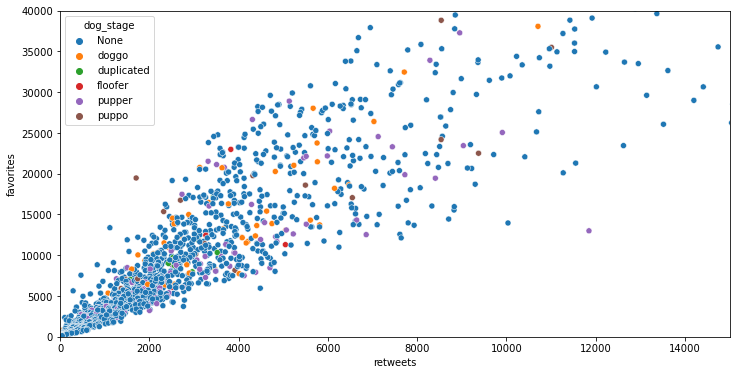

In [104]:
# zoom in to take a closer look at how different dog stages are distributed
plt.figure(figsize=(12,6))
sns.scatterplot(x='retweets',y='favorites', data=df1, hue='dog_stage')
plt.xlim(0,15000)
plt.ylim(0,40000)

(0.0, 10000.0)

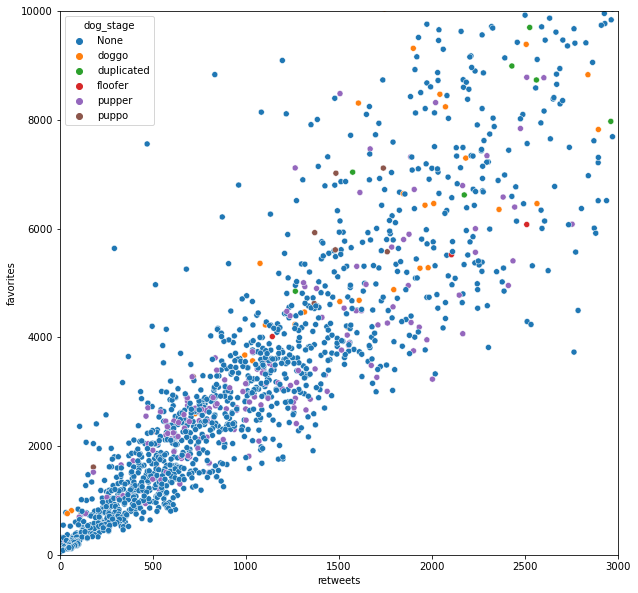

In [105]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='retweets',y='favorites', data=df1, hue='dog_stage')
plt.xlim(0,3000)
plt.ylim(0,10000)

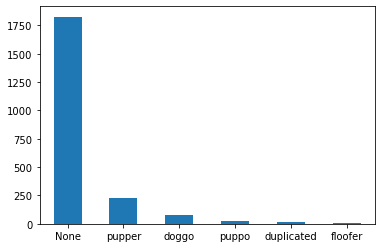

In [106]:
df1.dog_stage.value_counts().plot.bar()
plt.xticks(rotation=0);
# most of the data points have no dog_stage label, doggo and pupper are the majority among all those woth label
# it seems that doggo are more sparsely distributed and pupper more densely distributed from the graph above
# since pupper seems to be clustered in left lower part of the graph, 
# I guess pupper label might have some ability to predict how many favorites the post will get
# I'll testify this guess by using statistical model

In [107]:
import statsmodels.api as sm
df1['intercept']=1
df1[['doggo','duplicated','floofer','pupper','puppo']]=pd.get_dummies(df1.dog_stage).drop('None',axis=1)
lm = sm.OLS(df1['favorites'], df1[['retweets','doggo','duplicated','floofer','pupper','puppo','intercept']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:02:58   Log-Likelihood:                -21534.
No. Observations:                2171   AIC:                         4.308e+04
Df Residuals:                    2164   BIC:                         4.312e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
retweets       2.3641      0.023    101.950      0.000       2.319       2.410
doggo         67.2473    586.567      0.115      0.909   -1083.045    1217.540
duplicated   907.6321   1427.009      0.636      0.525   -1890.820    3706.084
floofer    -1053.1566   1645.333     -0.640      0.522   -4279.755    2173.442
pupper      -926.6878    348.497     -2.659      0.008   -1610.113    -243.263
puppo       3525.5324   1015.175      3.473      0.001    1534.712    5516.353
intercept   2292.6350    129.624     17.687      0.000    2038.434    2546.836
==============================================================================
Omnibus:                      546.204   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36352.950
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                      23.047   Cond. No.                     8.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,X = dmatrices('favorites ~ retweets + doggo + pupper', df1, return_type='dataframe')
vif=pd.DataFrame()
vif['VIF factors']=[variance_inflation_factor(X.values,i) for i,k in enumerate(X)]
vif['Features']=X.columns

In [109]:
vif
# there aren't multicollinearity problem
# if I set P=0.05 as a thedshold, pupper does not predict how many favorites a post can get as I thought previously, 
# and retweets number is the only feature that predict favorite in a post

,VIF factors,Features
0,1.491808,Intercept
1,1.022282,retweets
2,1.026045,doggo
3,1.004278,pupper


### relationship of retweet, favorites, dog_stage and the rating of the dog image

In [110]:
df2 = df[['favorites','retweets','dog_stage']]
df2=pd.concat([df2, rating], axis=1)
df2.rename(columns={0:'dog_ratings'},inplace=True)

In [111]:
df2['intercept']=1
df2[['doggo','duplicated','floofer','pupper','puppo']]=pd.get_dummies(df2.dog_stage).drop('None',axis=1)


In [112]:
lm = sm.OLS(df2['dog_ratings'], df2[['intercept','favorites','retweets','doggo','duplicated','floofer','pupper','puppo']])
result=lm.fit()
result.summary()
# from this analysis, no feature can predict dog_ratings

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dog_ratings   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.09017
Date:                Sat, 24 Oct 2020   Prob (F-statistic):              0.999
Time:                        23:02:59   Log-Likelihood:                -6221.3
No. Observations:                2171   AIC:                         1.246e+04
Df Residuals:                    2163   BIC:                         1.250e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2252      0.120     10.216      0.000       0.990       1.460
favorites  -3.887e-06   1.86e-05     -0.209      0.834   -4.03e-05    3.26e-05
retweets    1.983e-05   4.83e-05      0.411      0.681   -7.49e-05       0.000
doggo         -0.0982      0.507     -0.194      0.846      -1.093       0.897
duplicated    -0.1430      1.234     -0.116      0.908      -2.563       2.277
floofer       -0.0757      1.423     -0.053      0.958      -2.866       2.715
pupper        -0.1652      0.302     -0.547      0.584      -0.757       0.427
puppo         -0.0658      0.880     -0.075      0.940      -1.792       1.661
==============================================================================
Omnibus:                     6098.194   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177029508.030
Skew:                          35.445   Prob(JB):                         0.00
Kurtosis:                    1400.141   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# as I know from the previous analysis, retweets and favorites are highly correlated
# I'llhave to see their vif
y,X = dmatrices('dog_ratings ~ retweets + favorites + doggo + pupper', df2, return_type='dataframe')
vif=pd.DataFrame()
vif['VIF factors']=[variance_inflation_factor(X.values,i) for i,k in enumerate(X)]
vif['Features']=X.columns

In [114]:
vif
# to my surprise, no VIF is higher than 10, however, if I try to be stricter, 
# I can argue that VIF of retweets and favorites are more than 5, so I'll remove retweets to see how it works

,VIF factors,Features
0,1.713264,Intercept
1,5.980489,retweets
2,5.967343,favorites
3,1.026045,doggo
4,1.007871,pupper


In [115]:
lm = sm.OLS(df2['dog_ratings'], df2[['intercept','favorites','doggo','duplicated','floofer','pupper','puppo']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dog_ratings   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.07714
Date:                Sat, 24 Oct 2020   Prob (F-statistic):              0.998
Time:                        23:02:59   Log-Likelihood:                -6221.4
No. Observations:                2171   AIC:                         1.246e+04
Df Residuals:                    2164   BIC:                         1.250e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2180      0.119     10.267      0.000       0.985       1.451
favorites   3.056e-06   7.72e-06      0.396      0.692   -1.21e-05    1.82e-05
doggo         -0.0858      0.506     -0.169      0.865      -1.079       0.907
duplicated    -0.1403      1.234     -0.114      0.909      -2.560       2.279
floofer       -0.0629      1.422     -0.044      0.965      -2.852       2.726
pupper        -0.1591      0.301     -0.528      0.598      -0.750       0.432
puppo         -0.0774      0.880     -0.088      0.930      -1.803       1.648
==============================================================================
Omnibus:                     6098.852   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177161614.444
Skew:                          35.455   Prob(JB):                         0.00
Kurtosis:                    1400.662   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='favorites', ylabel='dog_ratings'>

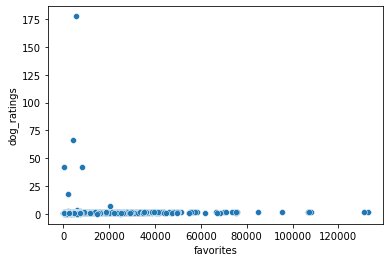

In [116]:
sns.scatterplot(x='favorites',y='dog_ratings',data=df2)
# perhaps it is the noises in dog_ratings that interfere with the model prediction

In [117]:
df3 = df2[df2['dog_ratings']<1.5].copy()
# remove outliers in dog_ratings

<AxesSubplot:xlabel='favorites', ylabel='dog_ratings'>

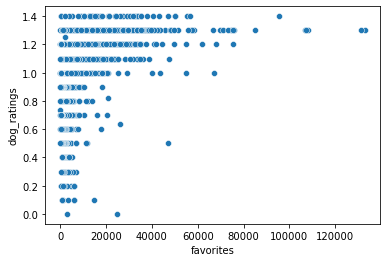

In [118]:
sns.scatterplot(x='favorites',y='dog_ratings',data=df3)

In [119]:
# it donesn't look like using linear model is a good choice, but I'll try it out
lm = sm.OLS(df3['dog_ratings'], df3[['intercept','favorites','doggo','duplicated','floofer','pupper','puppo']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dog_ratings   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     66.18
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.06e-75
Time:                        23:02:59   Log-Likelihood:                 380.97
No. Observations:                2160   AIC:                            -747.9
Df Residuals:                    2153   BIC:                            -708.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9931      0.006    174.862      0.000       0.982       1.004
favorites   6.863e-06   3.69e-07     18.619      0.000    6.14e-06    7.59e-06
doggo          0.0731      0.024      3.024      0.003       0.026       0.120
duplicated     0.0257      0.059      0.436      0.663      -0.090       0.141
floofer        0.1199      0.068      1.766      0.078      -0.013       0.253
pupper         0.0312      0.014      2.166      0.030       0.003       0.060
puppo          0.0684      0.042      1.630      0.103      -0.014       0.151
==============================================================================
Omnibus:                      758.311   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2697.019
Skew:                          -1.734   Prob(JB):                         0.00
Kurtosis:                       7.235   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# it's better in terms of predicting dog_ratings compared with the previous one with outliers inside the dataframe.
# I noticed that R-squared is only 0.156 meaning only 15% of the data points can be explained by the linear relationship.
# So I'll say none of these features really has a good linear relationship with the ratings that other people gave

### relation between dog prediction and favorites

In [121]:
df.groupby('p1_dog').mean()['favorites'].round(2)

p1_dog
False    7773.68
True     9293.82
Name: favorites, dtype: float64

In [122]:
df.groupby('p2_dog').mean()['favorites'].round(2)

p2_dog
False    7636.14
True     9320.32
Name: favorites, dtype: float64

In [123]:
df.groupby('p3_dog').mean()['favorites'].round(2)

p3_dog
False    8078.43
True     9210.86
Name: favorites, dtype: float64

In [124]:
# When looking at the three tables, there are no big difference in terms of favorites counts.
# Generally speaking, there are slightly more favorites when the models predict it is a dog in the photo.

In [125]:
dog_and_favorites = df.groupby(['p1_dog','p2_dog','p3_dog']).mean()['favorites'].round(2)

In [126]:
pd.DataFrame(dog_and_favorites)

favorites
p1_dog p2_dog p3_dog           
False  False  False     7048.88
              True      8670.13
       True   False    10087.77
              True      8271.83
True   False  False     6642.21
              True      9512.72
       True   False     9970.65
              True      9291.56

In [127]:
# As they are put together, the results become more inconsistent.
# I expected photo which all three models predict to be not a dog might have fewer mean favorites counts, 
# but it actually has the second fewest favorites counts instead of the fewest.
# The group where all models predict to be a dog doesn't have the highest favorites counts as expected.
# What is worth noting is that in the group where p1/p3 models predict to be not a dog and p2 predict to be a dog 
# has the highest favorites counts among all. I guess there might be outliers in this group.

<AxesSubplot:>

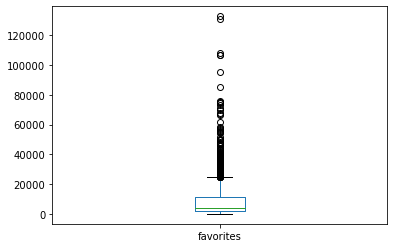

In [128]:
df.favorites.plot.box()

In [129]:
upper = df.favorites.quantile(0.75)
lower = df.favorites.quantile(0.25)
IQR = upper -lower
upper_boundary= upper + 1.5*IQR
upper_boundary

24870.25

In [130]:
fav_outliers= df[(df.favorites > upper_boundary)]

In [131]:
mask1= df.p1_dog==False
mask2= df.p2_dog==True
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.15384615384615385

In [132]:
mask1= df.p1_dog==True
mask2= df.p2_dog==True
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.08275862068965517

In [133]:
mask1= df.p1_dog==True
mask2= df.p2_dog==True
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.08811305070656691

In [134]:
mask1= df.p1_dog==True
mask2= df.p2_dog==False
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.07058823529411765

In [135]:
mask1= df.p1_dog==True
mask2= df.p2_dog==False
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06976744186046512

In [136]:
mask1= df.p1_dog==False
mask2= df.p2_dog==True
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06315789473684211

In [137]:
mask1= df.p1_dog==False
mask2= df.p2_dog==False
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06451612903225806

In [138]:
mask1= df.p1_dog==False
mask2= df.p2_dog==False
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06818181818181818

In [139]:
# it looks like my assunption is right that p1:False/p2:True/p3:False group has around two times more outliers than other group
# and that can explain why it has abnormally high amount of mean favorites counts

In [1]:
import seaborn as sns

In [2]:
sns.__version__

'0.11.0'